# Visualization with Seaborn

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

In [2]:
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/eu_trade_sums.csv')

In [108]:
df.head(10)

,trade_type,partner,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
geo,,,,,,,,,,,,,,,,,,,
AT,Export,EU28,193043.0,187548.0,184865.0,181689.0,181889.0,166299.0,143052.0,181180.0,176327.0,159517.0,147064.0,142481.0,131439.0,126666.0,NaN,NaN,NaN
AT,Export,EXT_EU28,82468.0,80797.0,78903.0,77668.0,73038.0,63858.0,53376.0,65339.0,62447.0,58309.0,53871.0,46923.0,40317.0,39731.0,NaN,NaN,NaN
AT,Import,EU28,215023.0,210492.0,211444.0,212546.0,212734.0,187011.0,160875.0,197137.0,190105.0,175463.0,165908.0,160883.0,144982.0,134624.0,NaN,NaN,NaN
AT,Import,EXT_EU28,65242.0,63511.0,64554.0,65337.0,62293.0,52877.0,44262.0,53467.0,47817.0,43097.0,38657.0,31628.0,30994.0,30983.0,NaN,NaN,NaN
BE,Export,EU28,517836.0,502888.0,495145.0,486102.0,492083.0,449191.0,402557.0,493688.0,478972.0,446775.0,412912.0,380546.0,349210.0,345248.0,NaN,NaN,NaN
BE,Export,EXT_EU28,201294.0,208167.0,210766.0,208074.0,191352.0,165868.0,129415.0,147922.0,149924.0,137399.0,124557.0,112579.0,102730.0,111874.0,NaN,NaN,NaN
BE,Import,EU28,425974.0,444974.0,451816.0,461888.0,454022.0,407918.0,357932.0,443276.0,423886.0,400297.0,369450.0,334570.0,305704.0,305757.0,NaN,NaN,NaN
BE,Import,EXT_EU28,251526.0,239457.0,228369.0,221686.0,216871.0,182226.0,150802.0,190809.0,176710.0,159810.0,142853.0,124579.0,109685.0,113683.0,NaN,NaN,NaN
BG,Export,EU28,29752.0,27529.0,26702.0,24474.0,25378.0,19103.0,15329.0,18490.0,16692.0,14664.0,11340.0,10006.0,8500.0,7559.0,NaN,NaN,NaN


In [6]:
yrs = [str(yr) for yr in range(2002,2016)]

In [7]:
df = df.set_index('geo')

In [12]:
uk_eu = df[(df['trade_type'] == 'Export') & 
        (df['partner'] == 'EU28')].loc[['EU28', 'UK']][yrs].T

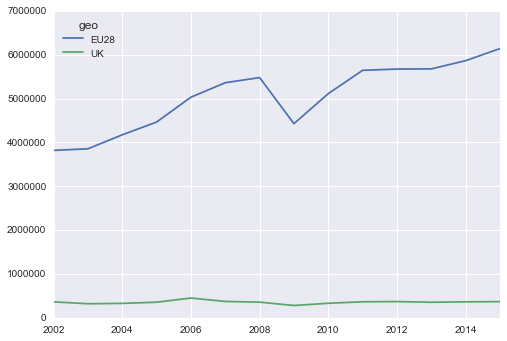

In [13]:
uk_eu.plot()

## Scatter Plot

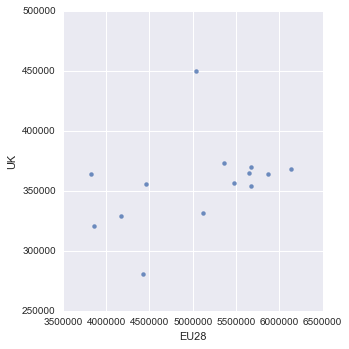

In [14]:
sns.lmplot('EU28', 'UK', data=uk_eu, fit_reg=False)

## Density Plot

In [50]:
uk_eu_trade = df[(df['trade_type'] == 'Export') &
                 (df['partner'] == 'EU28')].loc['UK'][yrs].T

In [83]:
uk_eu_trade.name = "UK-EU"

In [84]:
uk_eu_trade = uk_eu_trade.astype(int)

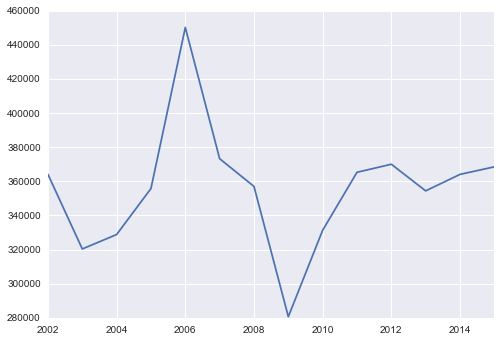

In [85]:
uk_eu_trade.plot()

In [49]:
uk_noneu_trade = df[(df['trade_type'] == 'Export') &
                (df['partner'] == 'EXT_EU28')].loc['UK'][yrs].T

In [86]:
uk_noneu_trade.name = "UK-Non-EU"

In [87]:
uk_noneu_trade

2002    228493
2003    219982
2004    229696
2005    272441
2006    267942
2007    271456
2008    284998
2009    228765
2010    296174
2011    362484
2012    365917
2013    459670
2014    396446
2015    460978
Name: UK-Non-EU, dtype: int64

In [68]:
uk_noneu_trade = uk_noneu_trade.astype(int)

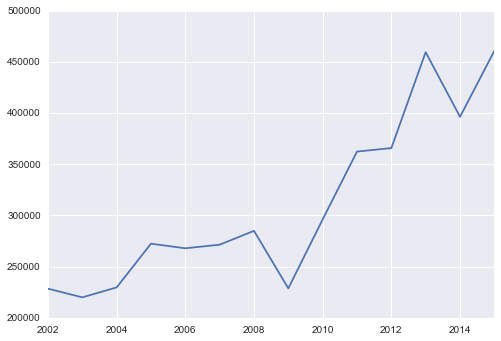

In [69]:
uk_noneu_trade.plot()

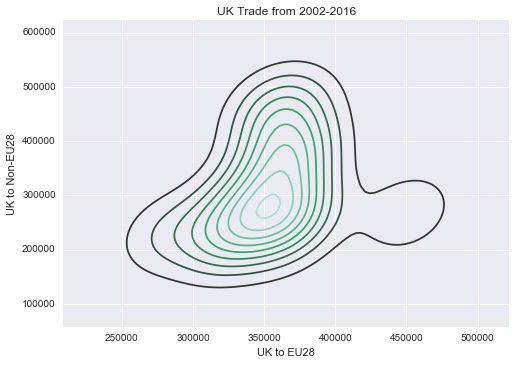

In [88]:
p = sns.kdeplot(uk_eu_trade, uk_noneu_trade)
p.set(xlabel='UK to EU28', ylabel='UK to Non-EU28', title="UK Trade from 2002-2016")

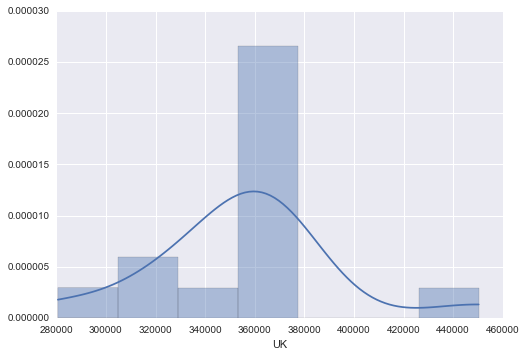

In [71]:
sns.distplot(uk_eu_trade)

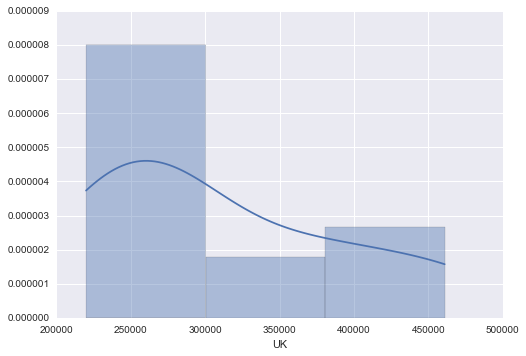

In [72]:
sns.distplot(uk_noneu_trade)

## Histogram

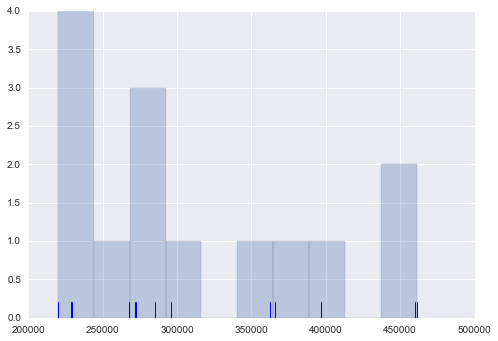

In [73]:
plt.hist(uk_noneu_trade, alpha=.3)
sns.rugplot(uk_noneu_trade);

## Boxplot

/Users/pmui/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/seaborn/categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


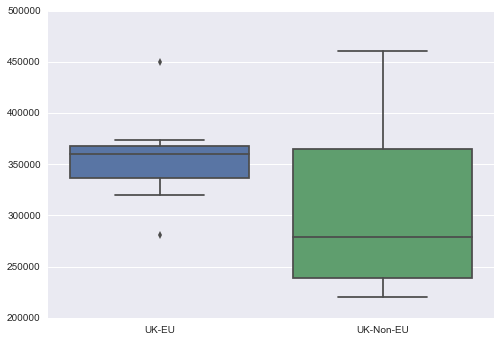

In [106]:
sns.boxplot(pd.concat([uk_eu_trade, uk_noneu_trade], axis=1))

## Violin Plot

/Users/pmui/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/seaborn/categorical.py:2296: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


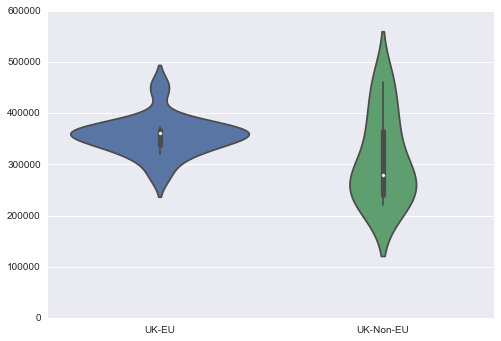

In [105]:
sns.violinplot(pd.concat([uk_eu_trade, uk_noneu_trade], axis=1), orient="v")

## Heatmap

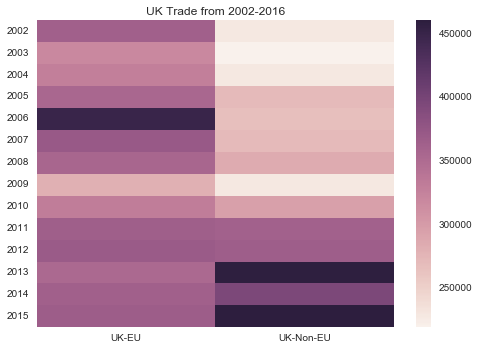

In [107]:
h = sns.heatmap(pd.concat([uk_eu_trade, uk_noneu_trade], axis=1), annot=False)
h.set(title="UK Trade from 2002-2016")

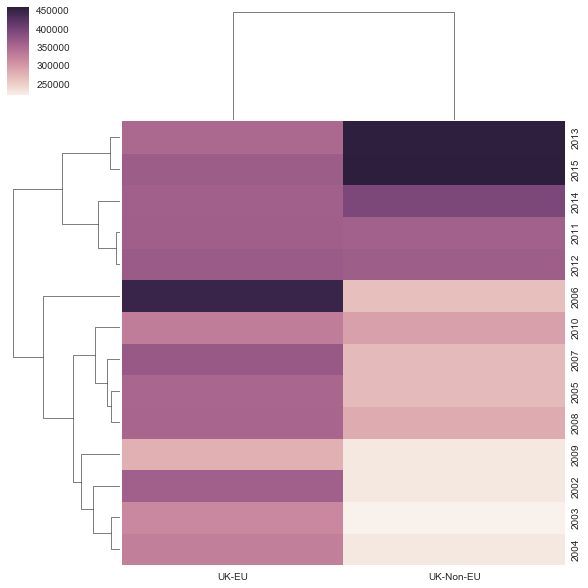

In [101]:
sns.clustermap(pd.concat([uk_eu_trade, uk_noneu_trade], axis=1))